# EDA

## Correlations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

## Data imports and Preprocessing

In [2]:
#client_attrition = pd.read_csv('../data/preprocessed/client_attrition_train.csv', sep=";")
client_attrition = pd.read_csv('../data/client_attrition_train.csv', sep=",")
client_attrition['account_status'] = client_attrition['account_status'].map(dict(open=0,closed=1))

client_attrition.drop(labels='customer_id',axis=1,inplace=True)
print(client_attrition.info())

display(client_attrition)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_age                     9503 non-null   float64
 1   customer_sex                     9109 non-null   object 
 2   customer_number_of_dependents    10127 non-null  int64  
 3   customer_education               10127 non-null  object 
 4   customer_civil_status            10127 non-null  object 
 5   customer_salary_range            9446 non-null   object 
 6   customer_relationship_length     10127 non-null  int64  
 7   customer_available_credit_limit  10127 non-null  float64
 8   credit_card_classification       10127 non-null  object 
 9   total_products                   10127 non-null  int64  
 10  period_inactive                  10127 non-null  int64  
 11  contacts_in_last_year            10127 non-null  int64  
 12  credit_card_debt_b

,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
0,38.0,F,2,High School,Married,40-60K,31,1593.0,Blue,4,2,4,1091,502.0,0.870,4136.0,67,0.718,0.685,0
1,46.0,F,2,Graduate,Unknown,below 40K,40,6568.0,Blue,5,2,2,0,6568.0,0.101,1507.0,33,0.222,0.000,1
2,43.0,M,1,High School,Married,80-120K,30,34516.0,Silver,1,1,3,2045,32471.0,0.590,4081.0,54,0.421,0.059,0
3,46.0,F,4,High School,Married,below 40K,36,2374.0,Blue,5,2,1,1332,1042.0,0.686,4253.0,81,0.884,0.561,0
4,40.0,M,4,High School,Single,80-120K,29,12978.0,Blue,3,3,2,0,12978.0,0.628,14134.0,85,0.700,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,NaN,F,2,High School,Single,40-60K,36,1677.0,Blue,2,3,1,0,1677.0,0.700,4035.0,87,0.891,0.000,0
10123,46.0,F,4,Uneducated,Single,Unknown,33,224541.0,Blue,3,3,3,1749,23200.0,0.626,4092.0,77,0.540,0.070,0
10124,44.0,M,0,High School,Single,60-80K,36,6606.0,Blue,6,3,2,2517,4089.0,0.825,4493.0,68,0.659,0.381,0
10125,39.0,F,5,Graduate,Single,below 40K,28,2077.0,Blue,3,3,2,0,2077.0,0.590,3647.0,69,0.917,0.000,0


In [3]:
# Test for missing Values

# cliet_attrition = client_attrition[client_attrition != 'Unknown']

client_attrition = client_attrition.dropna()

display(client_attrition)

display(client_attrition.isna().sum())



# non-numeric columns

print(client_attrition.select_dtypes(include = ['object']).columns)
for col in client_attrition.select_dtypes(include = ['object']).columns:
    print(col)
    print(client_attrition[col].unique())

# Removing rows with 'Unknown'

columns_to_remove_unknown = ['customer_sex', 'customer_education', 'customer_civil_status', 'customer_salary_range']
client_attrition = client_attrition.drop(client_attrition[(client_attrition[columns_to_remove_unknown] == 'Unknown').any(axis=1)].index)

# Making the data into category

cols_to_convert = ['customer_sex', 'customer_education', 'customer_civil_status', 'customer_salary_range', 'credit_card_classification']

for col in cols_to_convert:
    client_attrition[col] = client_attrition[col].astype('category')
    
display(client_attrition)


,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
0,38.0,F,2,High School,Married,40-60K,31,1593.0,Blue,4,2,4,1091,502.0,0.870,4136.0,67,0.718,0.685,0
1,46.0,F,2,Graduate,Unknown,below 40K,40,6568.0,Blue,5,2,2,0,6568.0,0.101,1507.0,33,0.222,0.000,1
2,43.0,M,1,High School,Married,80-120K,30,34516.0,Silver,1,1,3,2045,32471.0,0.590,4081.0,54,0.421,0.059,0
3,46.0,F,4,High School,Married,below 40K,36,2374.0,Blue,5,2,1,1332,1042.0,0.686,4253.0,81,0.884,0.561,0
4,40.0,M,4,High School,Single,80-120K,29,12978.0,Blue,3,3,2,0,12978.0,0.628,14134.0,85,0.700,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,48.0,F,5,Post-Graduate,Married,below 40K,40,1438.3,Blue,3,3,3,665,773.3,0.750,4100.0,84,0.615,0.462,0
10123,46.0,F,4,Uneducated,Single,Unknown,33,224541.0,Blue,3,3,3,1749,23200.0,0.626,4092.0,77,0.540,0.070,0
10124,44.0,M,0,High School,Single,60-80K,36,6606.0,Blue,6,3,2,2517,4089.0,0.825,4493.0,68,0.659,0.381,0
10125,39.0,F,5,Graduate,Single,below 40K,28,2077.0,Blue,3,3,2,0,2077.0,0.590,3647.0,69,0.917,0.000,0


customer_age                       0
customer_sex                       0
customer_number_of_dependents      0
customer_education                 0
customer_civil_status              0
customer_salary_range              0
customer_relationship_length       0
customer_available_credit_limit    0
credit_card_classification         0
total_products                     0
period_inactive                    0
contacts_in_last_year              0
credit_card_debt_balance           0
remaining_credit_limit             0
transaction_amount_ratio           0
total_transaction_amount           0
total_transaction_count            0
transaction_count_ratio            0
average_utilization                0
account_status                     0
dtype: int64

Index(['customer_sex', 'customer_education', 'customer_civil_status',
       'customer_salary_range', 'credit_card_classification'],
      dtype='object')
customer_sex
['F' 'M']
customer_education
['High School' 'Graduate' 'Unknown' 'Uneducated' 'Post-Graduate'
 'Doctorate' 'College']
customer_civil_status
['Married' 'Unknown' 'Single' 'Divorced']
customer_salary_range
['40-60K' 'below 40K' '80-120K' 'Unknown' '120K and more' '60-80K']
credit_card_classification
['Blue' 'Silver' 'Gold' 'Platinum']


,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
0,38.0,F,2,High School,Married,40-60K,31,1593.0,Blue,4,2,4,1091,502.0,0.870,4136.0,67,0.718,0.685,0
2,43.0,M,1,High School,Married,80-120K,30,34516.0,Silver,1,1,3,2045,32471.0,0.590,4081.0,54,0.421,0.059,0
3,46.0,F,4,High School,Married,below 40K,36,2374.0,Blue,5,2,1,1332,1042.0,0.686,4253.0,81,0.884,0.561,0
4,40.0,M,4,High School,Single,80-120K,29,12978.0,Blue,3,3,2,0,12978.0,0.628,14134.0,85,0.700,0.000,0
5,51.0,M,4,High School,Married,80-120K,42,14438.0,Blue,6,1,2,2517,11921.0,0.853,2090.0,47,0.880,0.174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10114,54.0,F,3,Uneducated,Single,40-60K,41,2488.0,Blue,3,1,3,2196,292.0,0.733,4361.0,75,0.630,0.883,0
10121,48.0,F,5,Post-Graduate,Married,below 40K,40,1438.3,Blue,3,3,3,665,773.3,0.750,4100.0,84,0.615,0.462,0
10124,44.0,M,0,High School,Single,60-80K,36,6606.0,Blue,6,3,2,2517,4089.0,0.825,4493.0,68,0.659,0.381,0
10125,39.0,F,5,Graduate,Single,below 40K,28,2077.0,Blue,3,3,2,0,2077.0,0.590,3647.0,69,0.917,0.000,0


As the data is already cleaned and preprocessed, we move forward with:

### Univariate Analysis

In [4]:
for col in client_attrition.columns:
    stats = client_attrition[col].describe()
    print(f"\nDescriptive statistics for {col}:\n{stats}\n")



Descriptive statistics for customer_age:
count    5373.000000
mean       46.329425
std         8.044378
min        26.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        73.000000
Name: customer_age, dtype: float64


Descriptive statistics for customer_sex:
count     5373
unique       2
top          M
freq      2788
Name: customer_sex, dtype: object


Descriptive statistics for customer_number_of_dependents:
count    5373.000000
mean        2.320119
std         1.286232
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: customer_number_of_dependents, dtype: float64


Descriptive statistics for customer_education:
count         5373
unique           6
top       Graduate
freq          1937
Name: customer_education, dtype: object


Descriptive statistics for customer_civil_status:
count        5373
unique          3
top       Married
freq         2693
Name: customer_civil_status, dtype: object


Desc

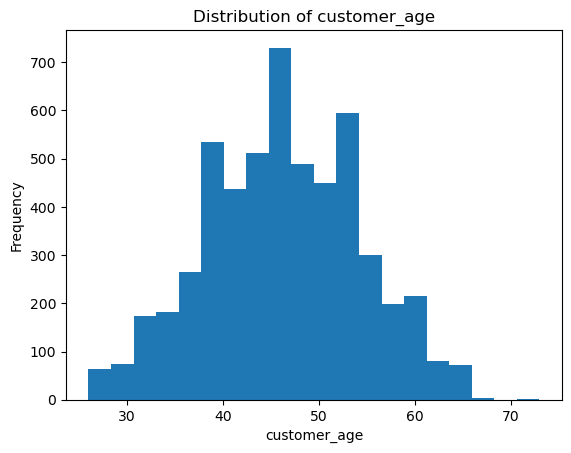

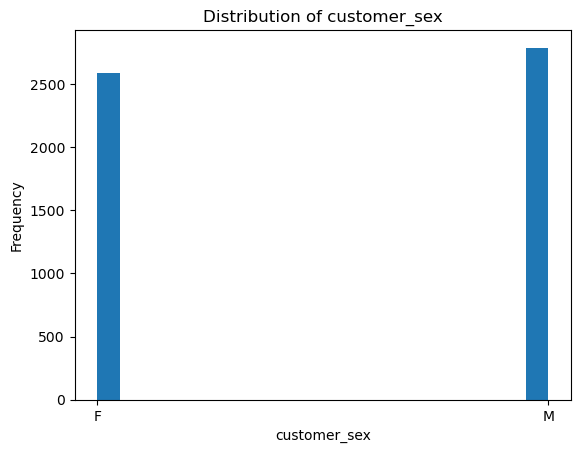

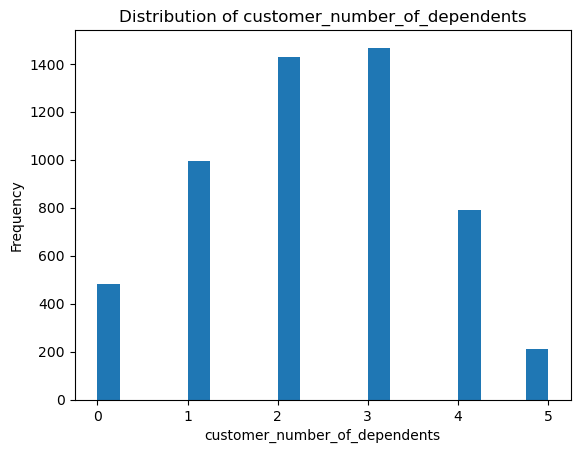

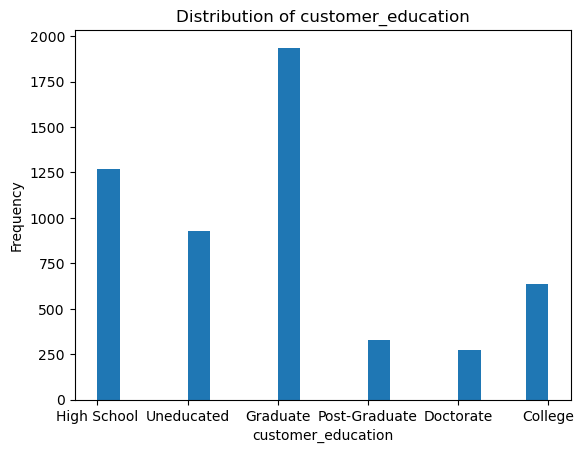

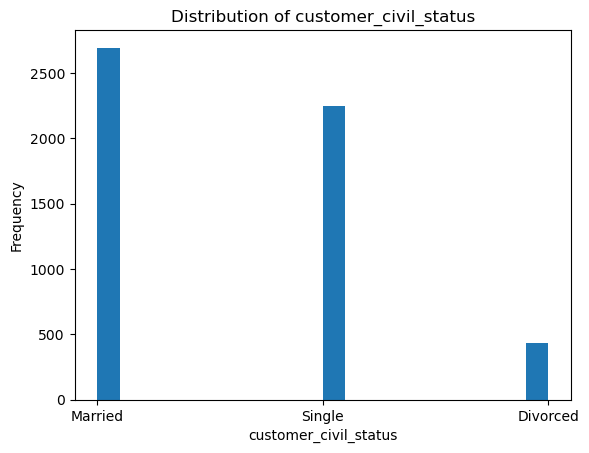

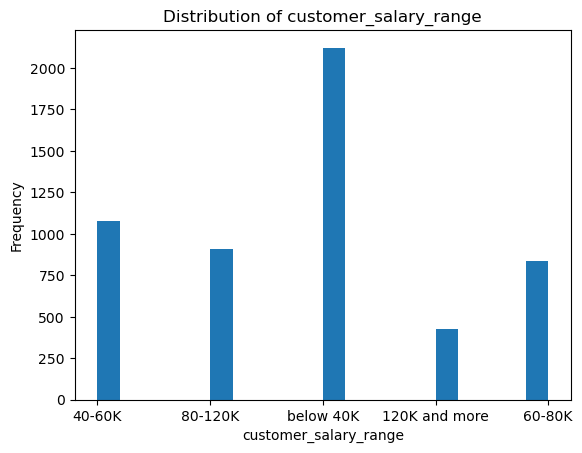

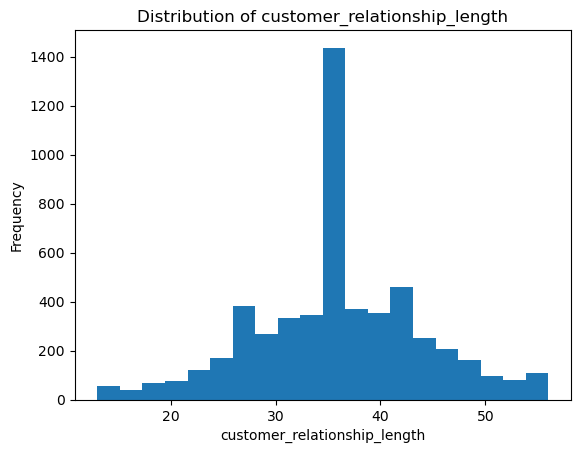

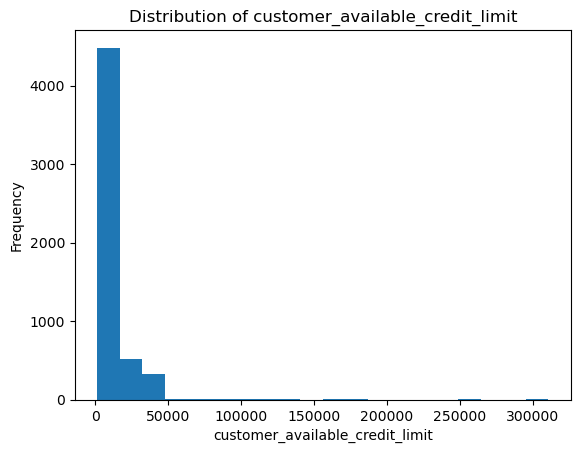

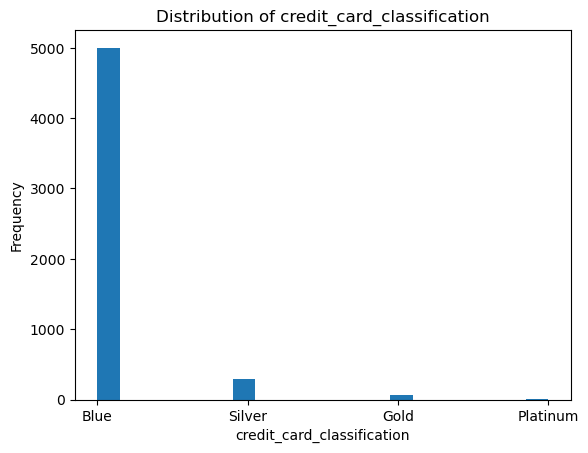

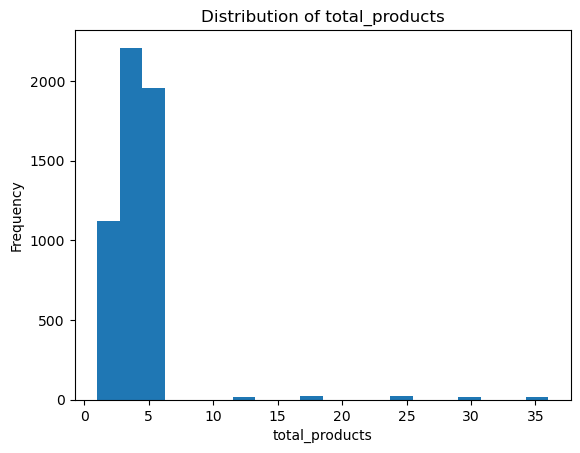

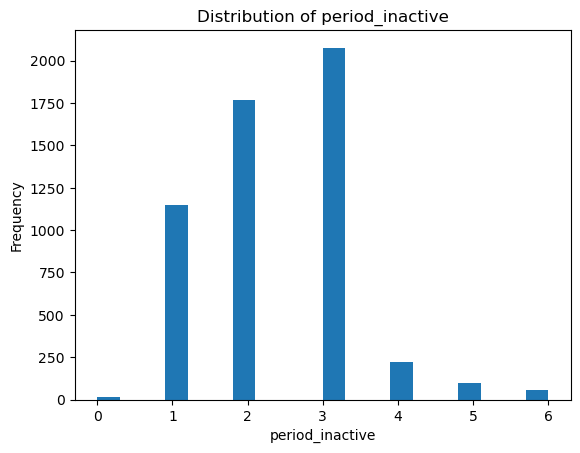

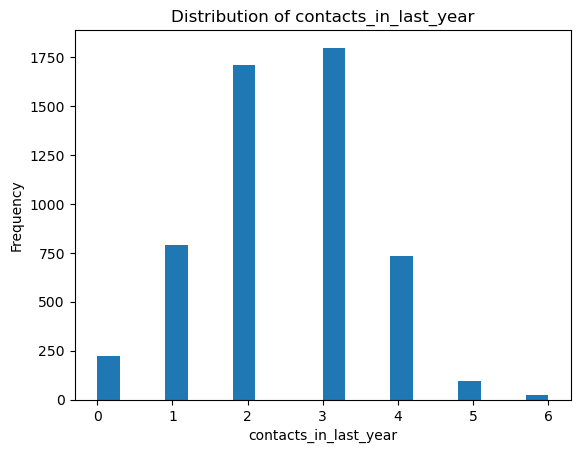

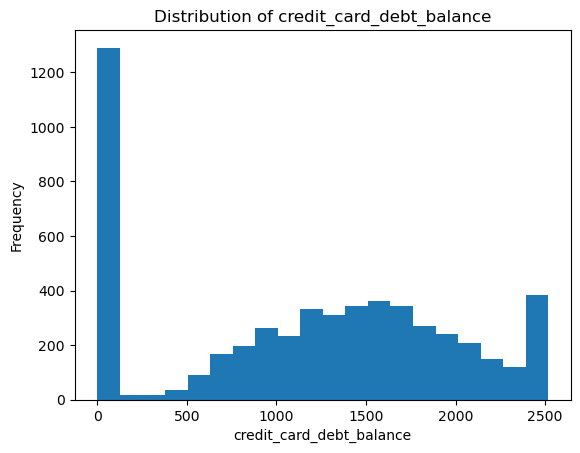

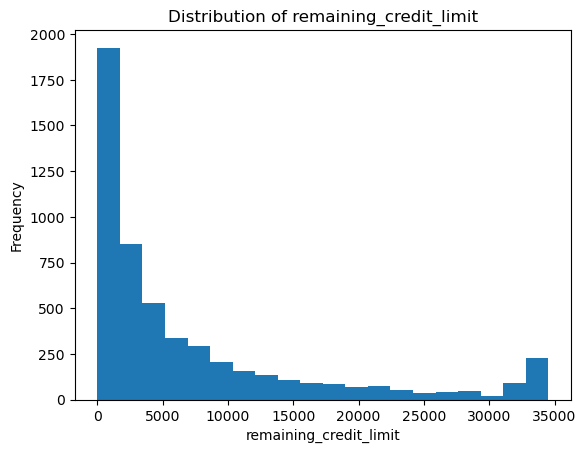

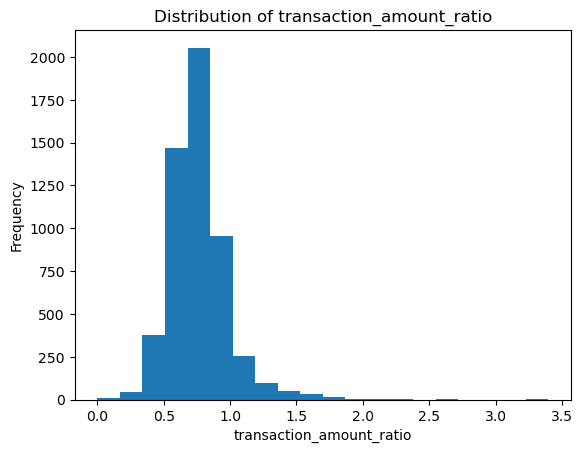

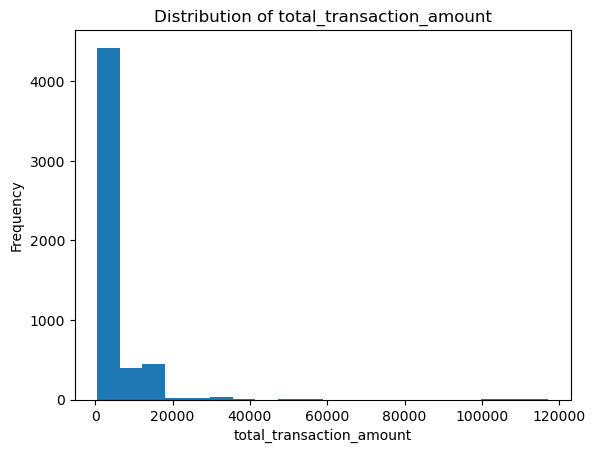

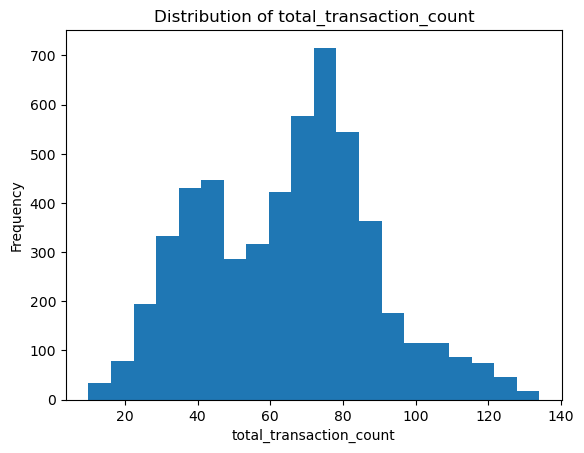

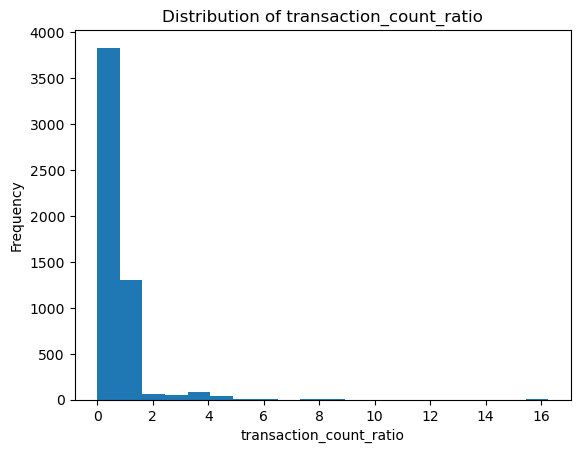

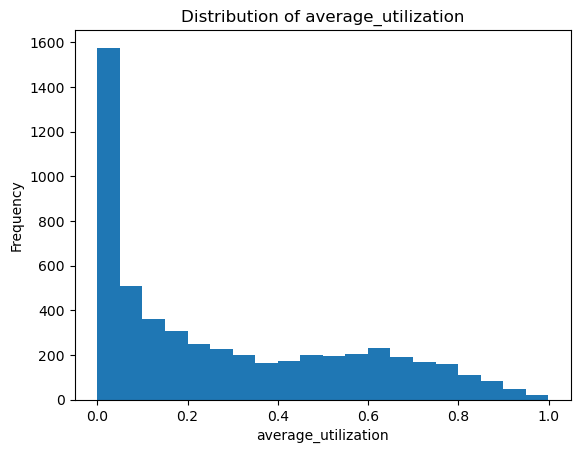

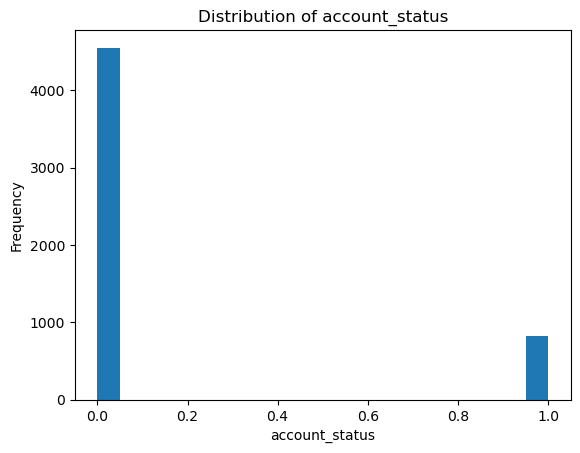

In [5]:
for col in client_attrition.columns:
    plt.hist(client_attrition[col], bins = 20)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f'Distribution of {col}')
    plt.show()

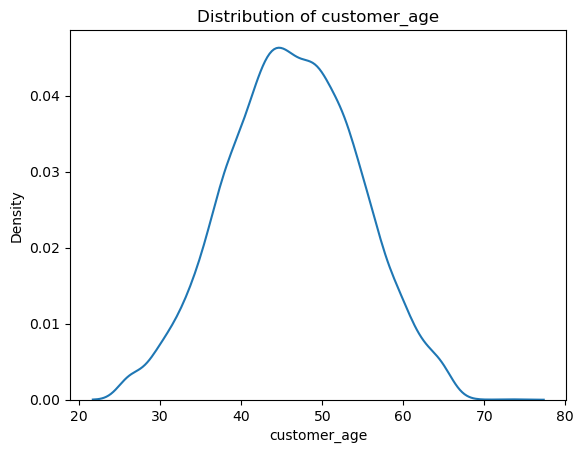

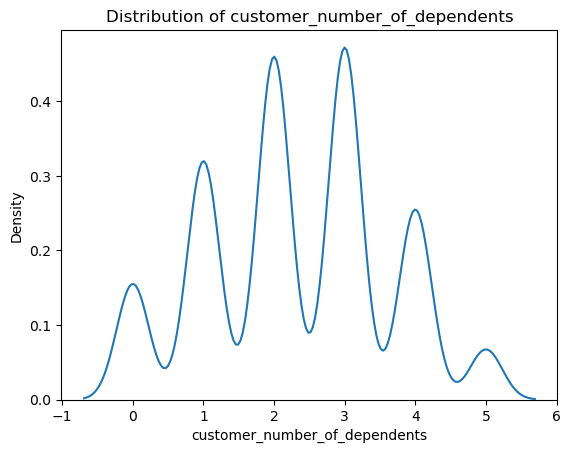

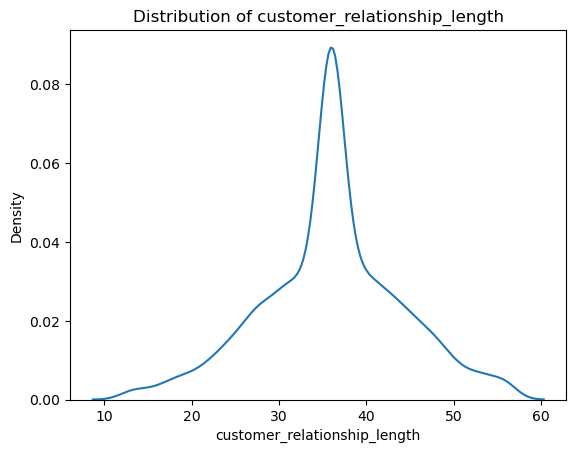

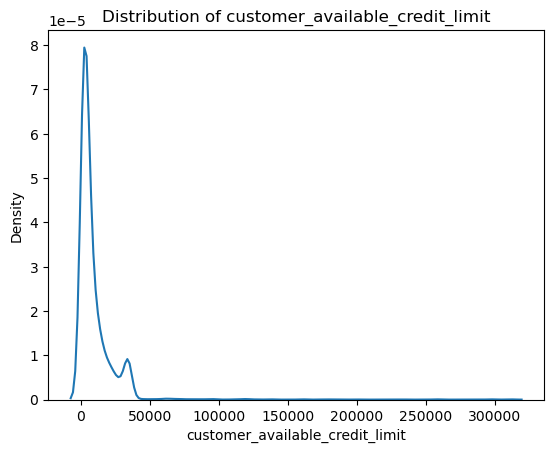

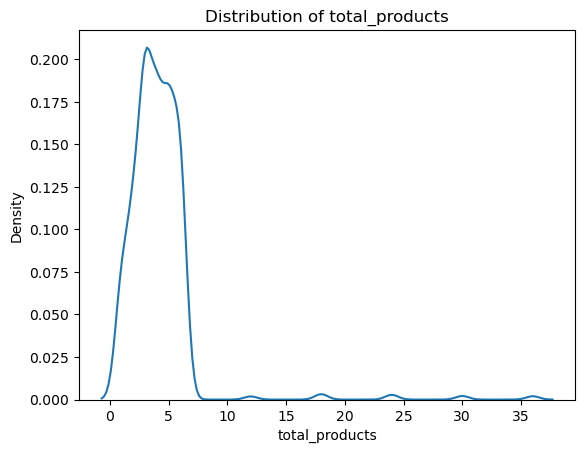

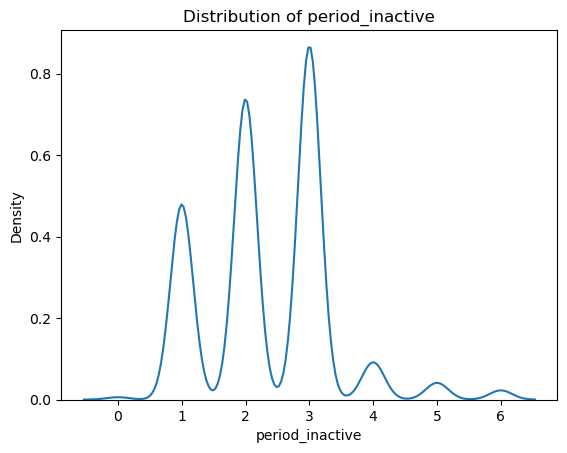

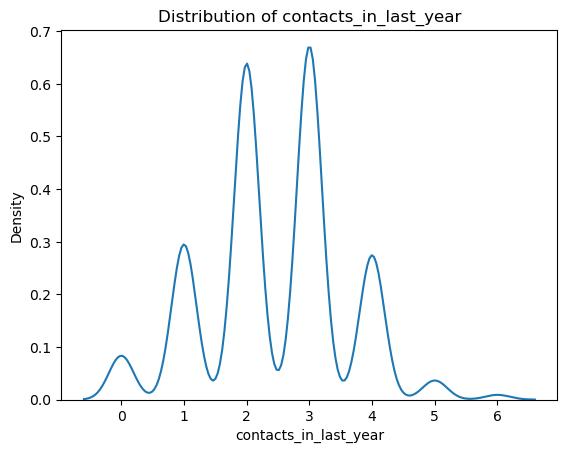

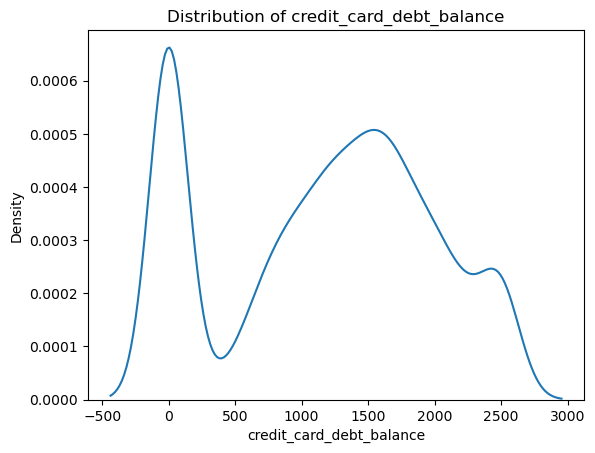

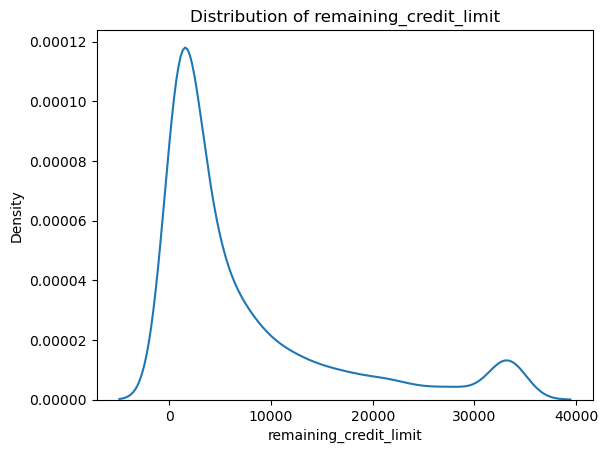

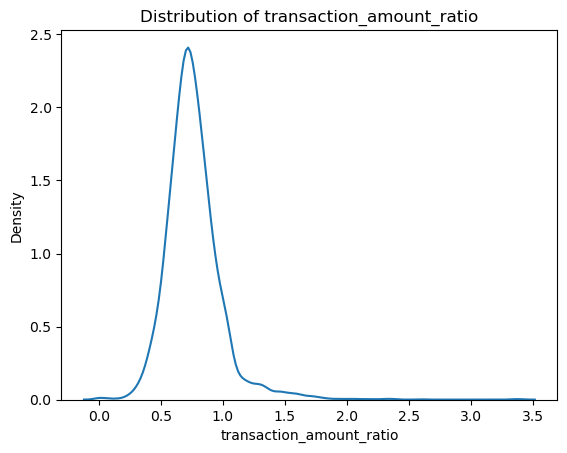

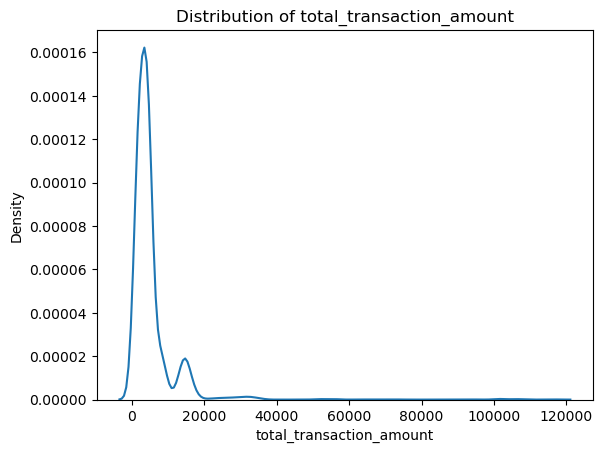

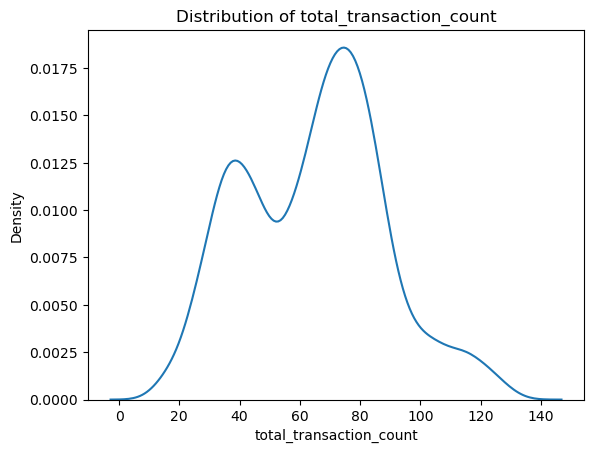

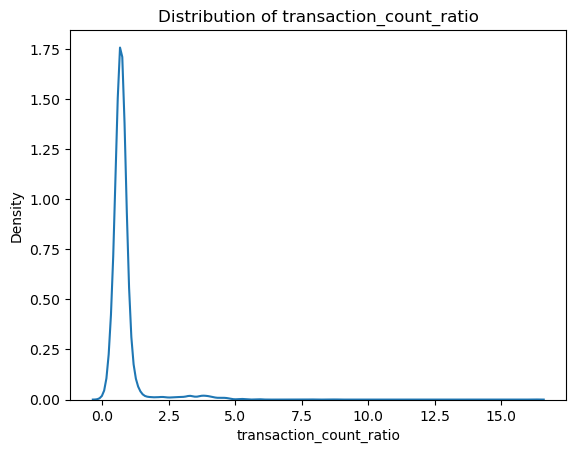

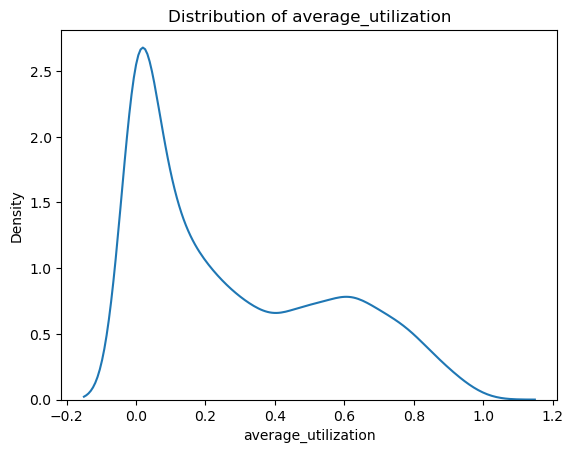

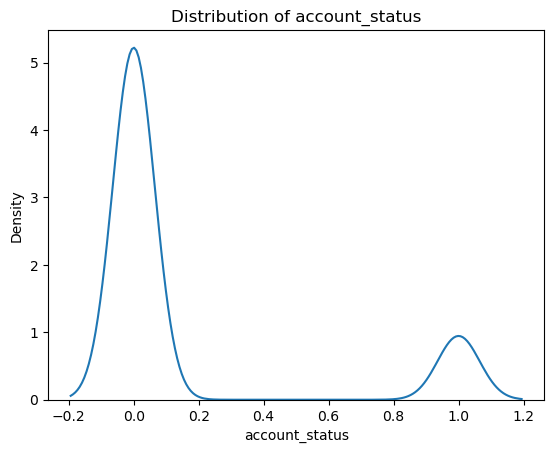

In [12]:

exclude_cols = ['customer_sex', 'customer_education', 'customer_civil_status', 'customer_salary_range', 'credit_card_classification']

for col in client_attrition.columns:
    if col in exclude_cols:
        continue  # skip this column
        
    if client_attrition[col].dtype == 'object':
        sns.countplot(x=col, data=client_attrition)
    else:
        sns.kdeplot(x=col, data=client_attrition)
    plt.xlabel(col)
    plt.title(f"Distribution of {col}")
    plt.show()


## Bivariate Analysis

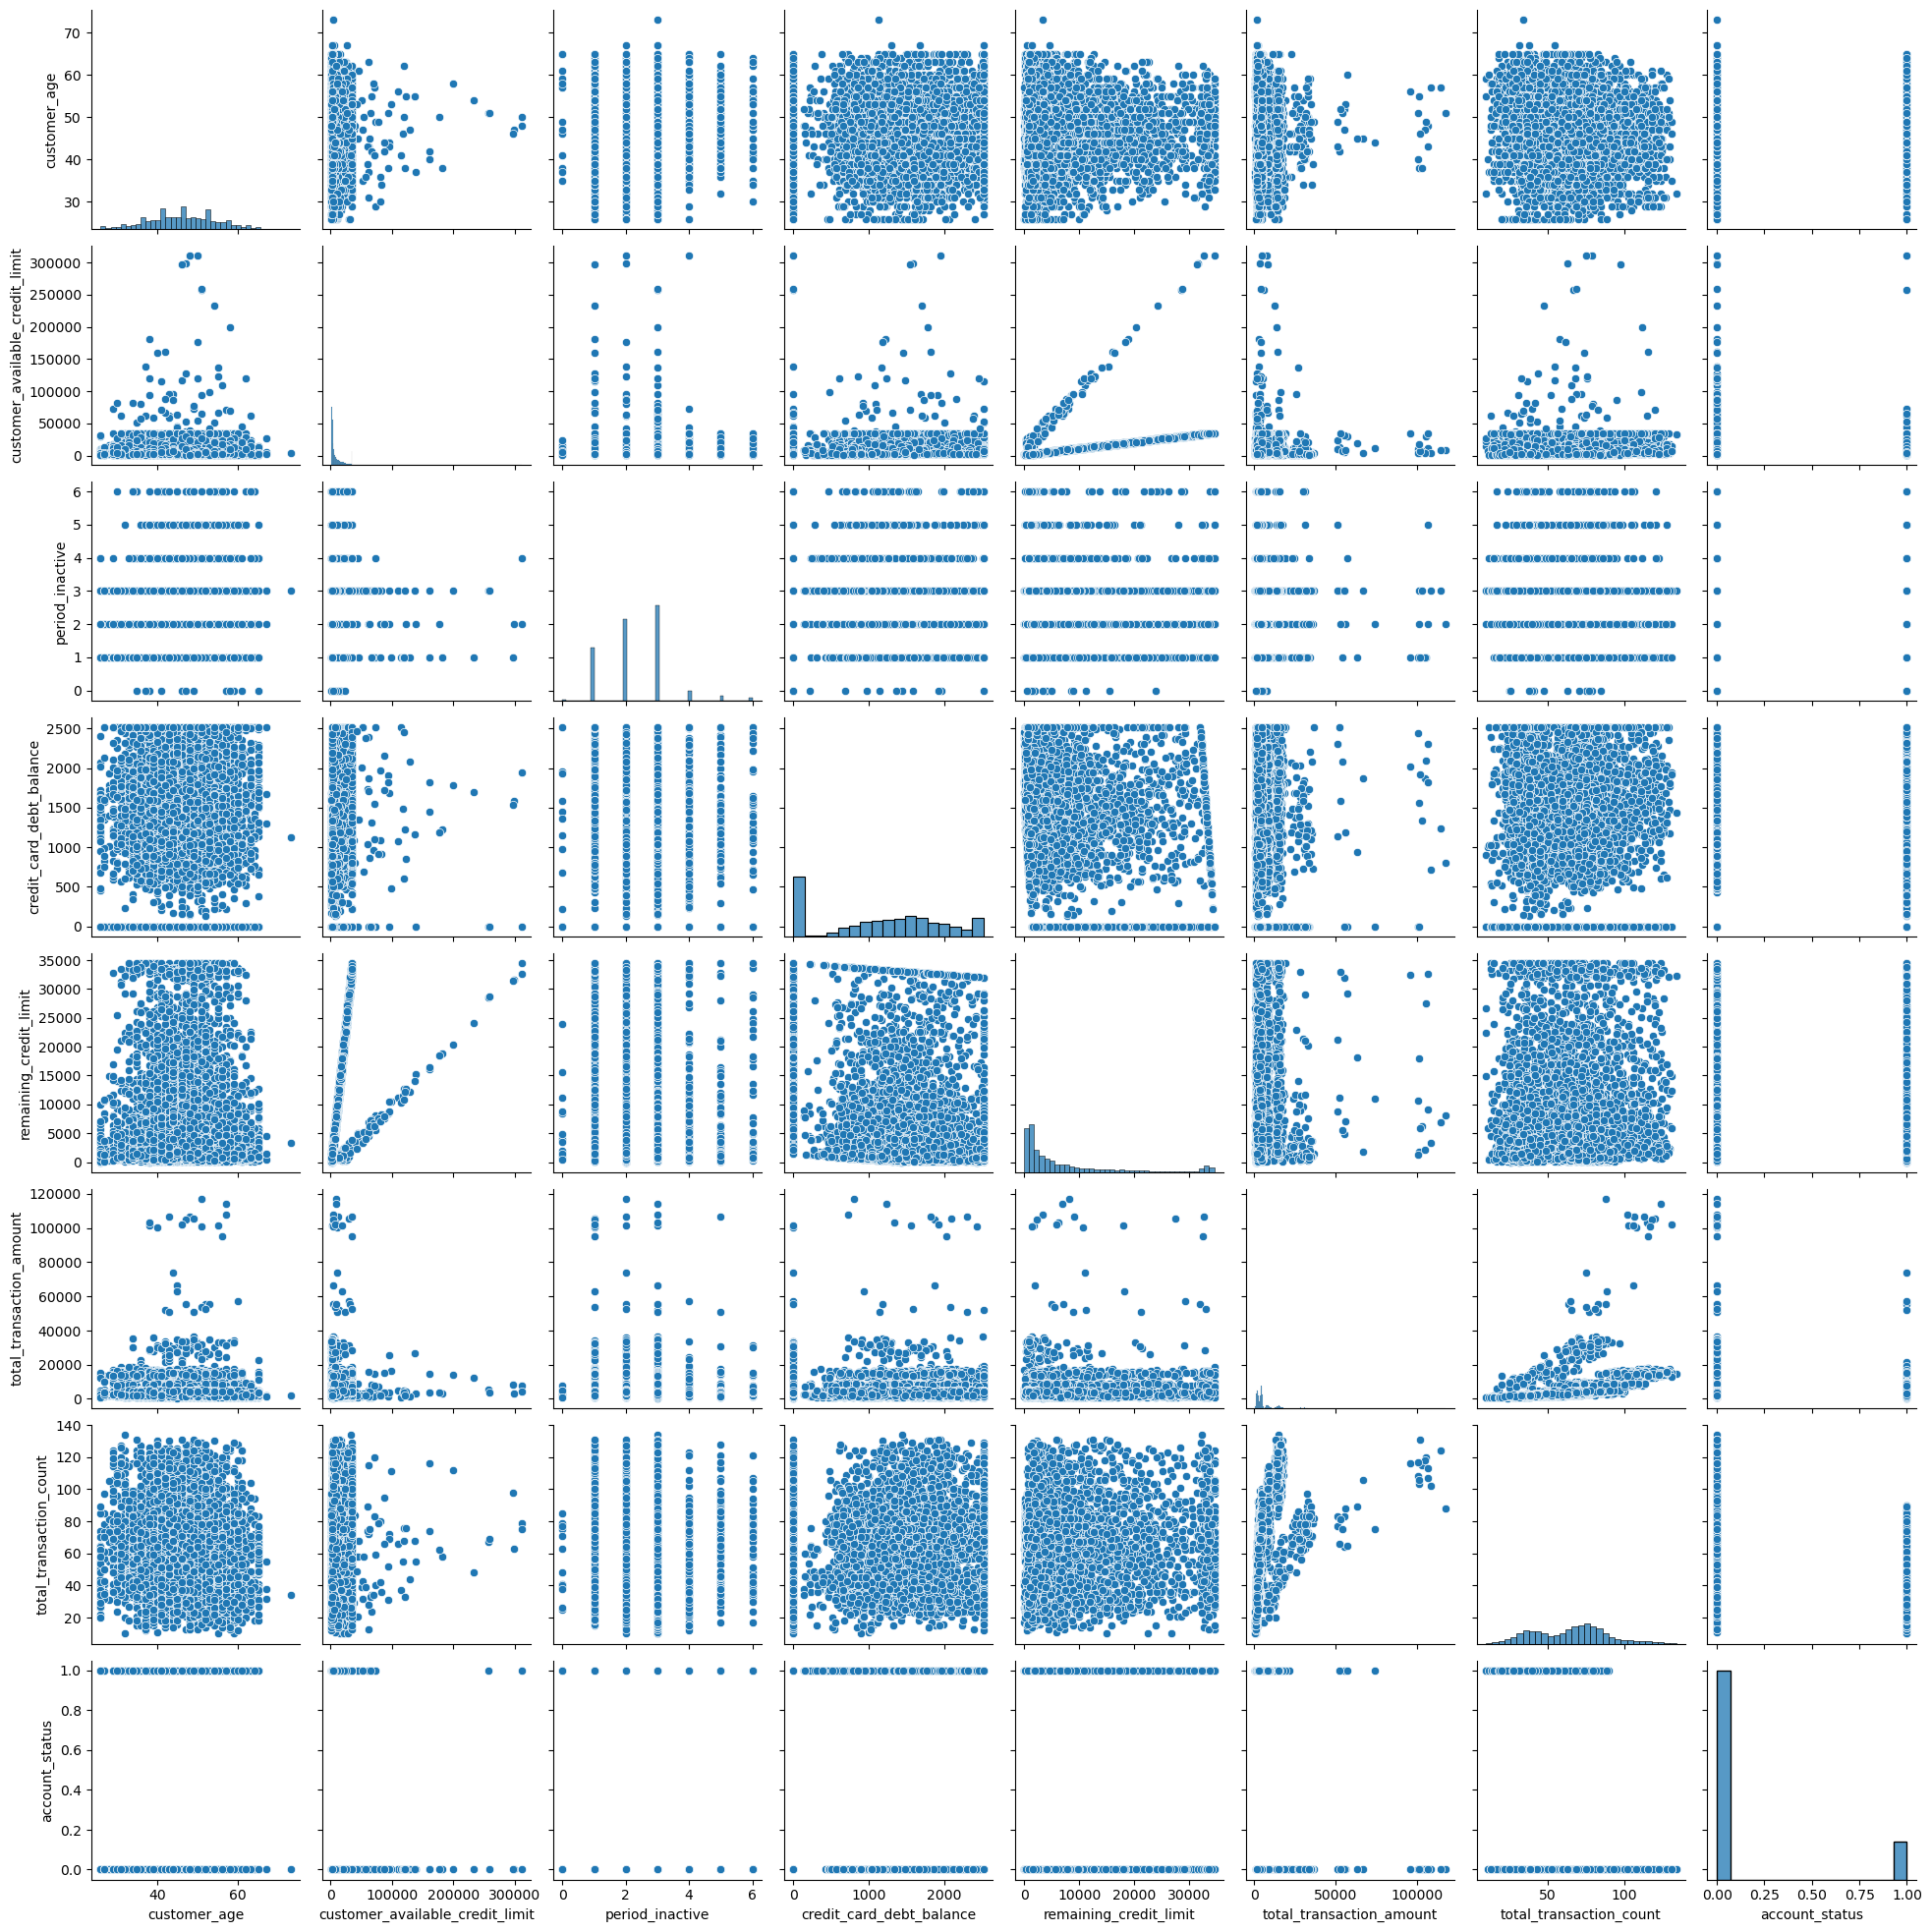

In [9]:
# for col1 in client_attrition.columns:
#     for col2 in client_attrition.columns:
#         if col1!=col2:
#             sns.scatterplot(x=col1, y=col2, data=client_attrition)
#             plt.show()
sns.pairplot(client_attrition[['customer_age','customer_available_credit_limit', 'period_inactive','credit_card_debt_balance', 'remaining_credit_limit', 'total_transaction_amount',
       'total_transaction_count', 'account_status','customer_sex', 'customer_education', 'customer_civil_status', 'customer_salary_range', 'credit_card_classification']])
plt.show()


All in all correlations are not significant apart from customer_age vs customer_relaltionship_length

The same conclusion can be drawn for not processed dataset

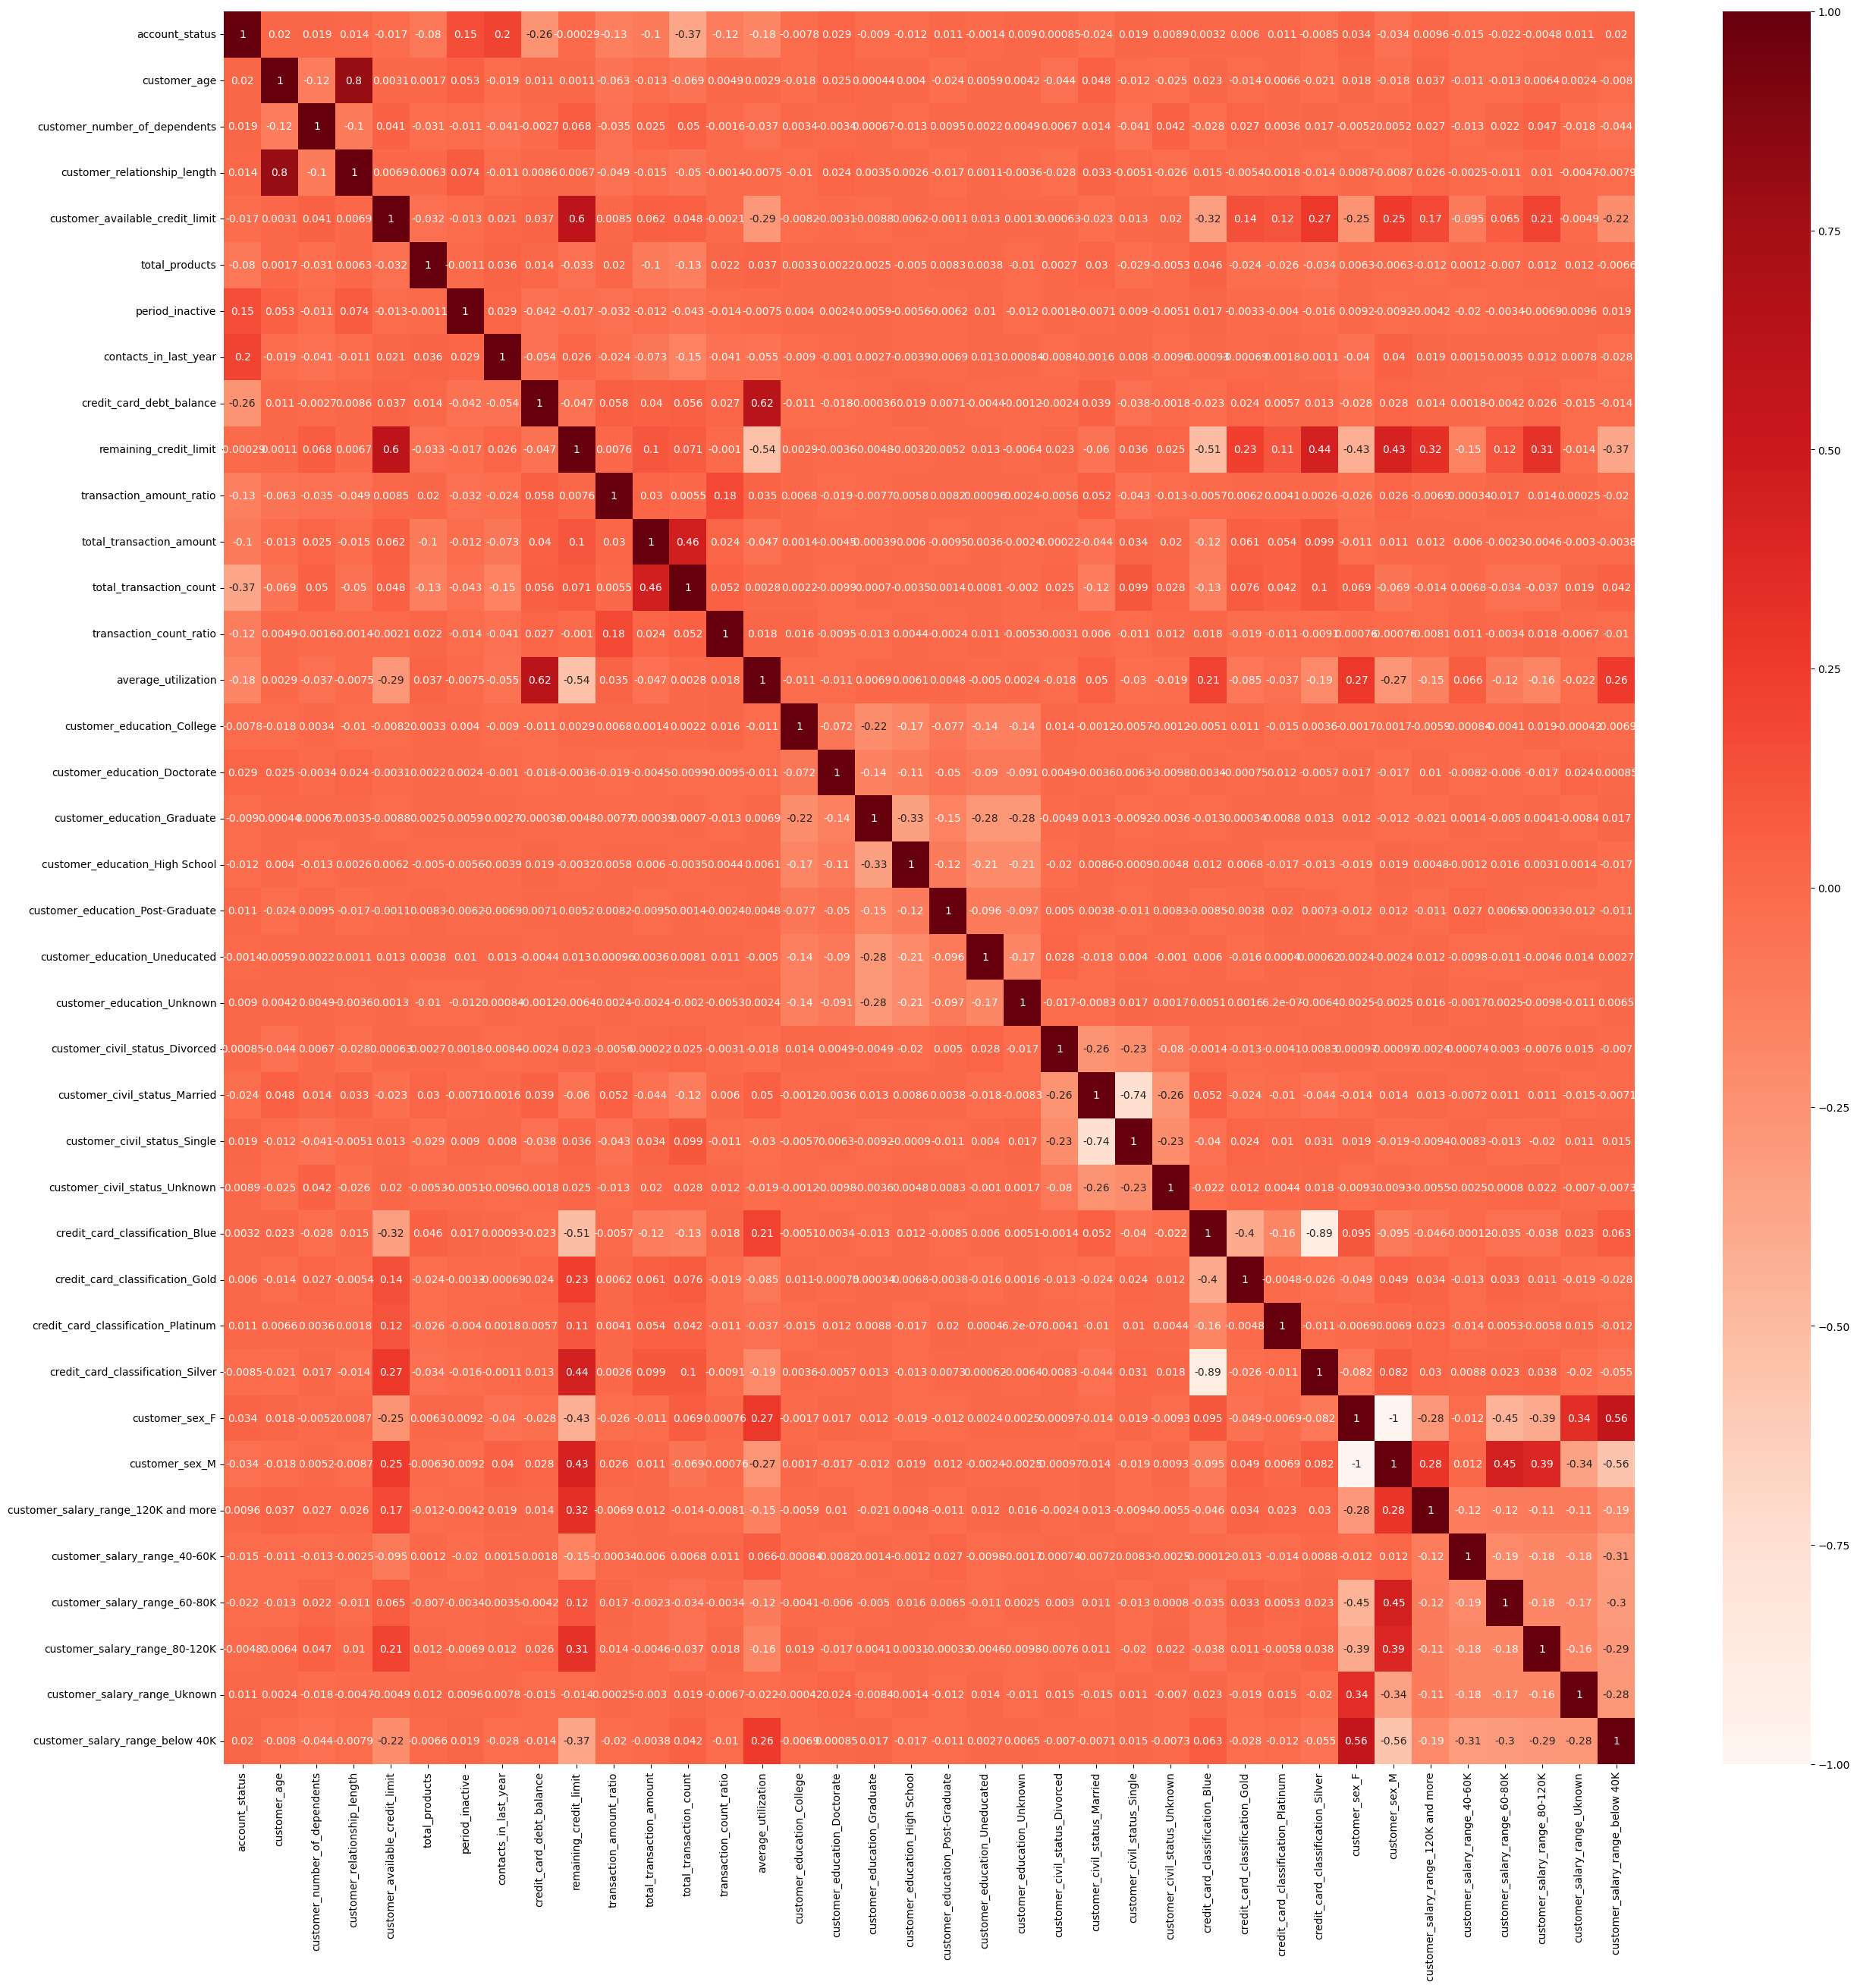

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = client_attrition.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
print(abs(cor["account_status"])[abs(cor["account_status"])>0.5])
# print(abs(cor)[abs(cor)>0.5])

account_status    1.0
Name: account_status, dtype: float64


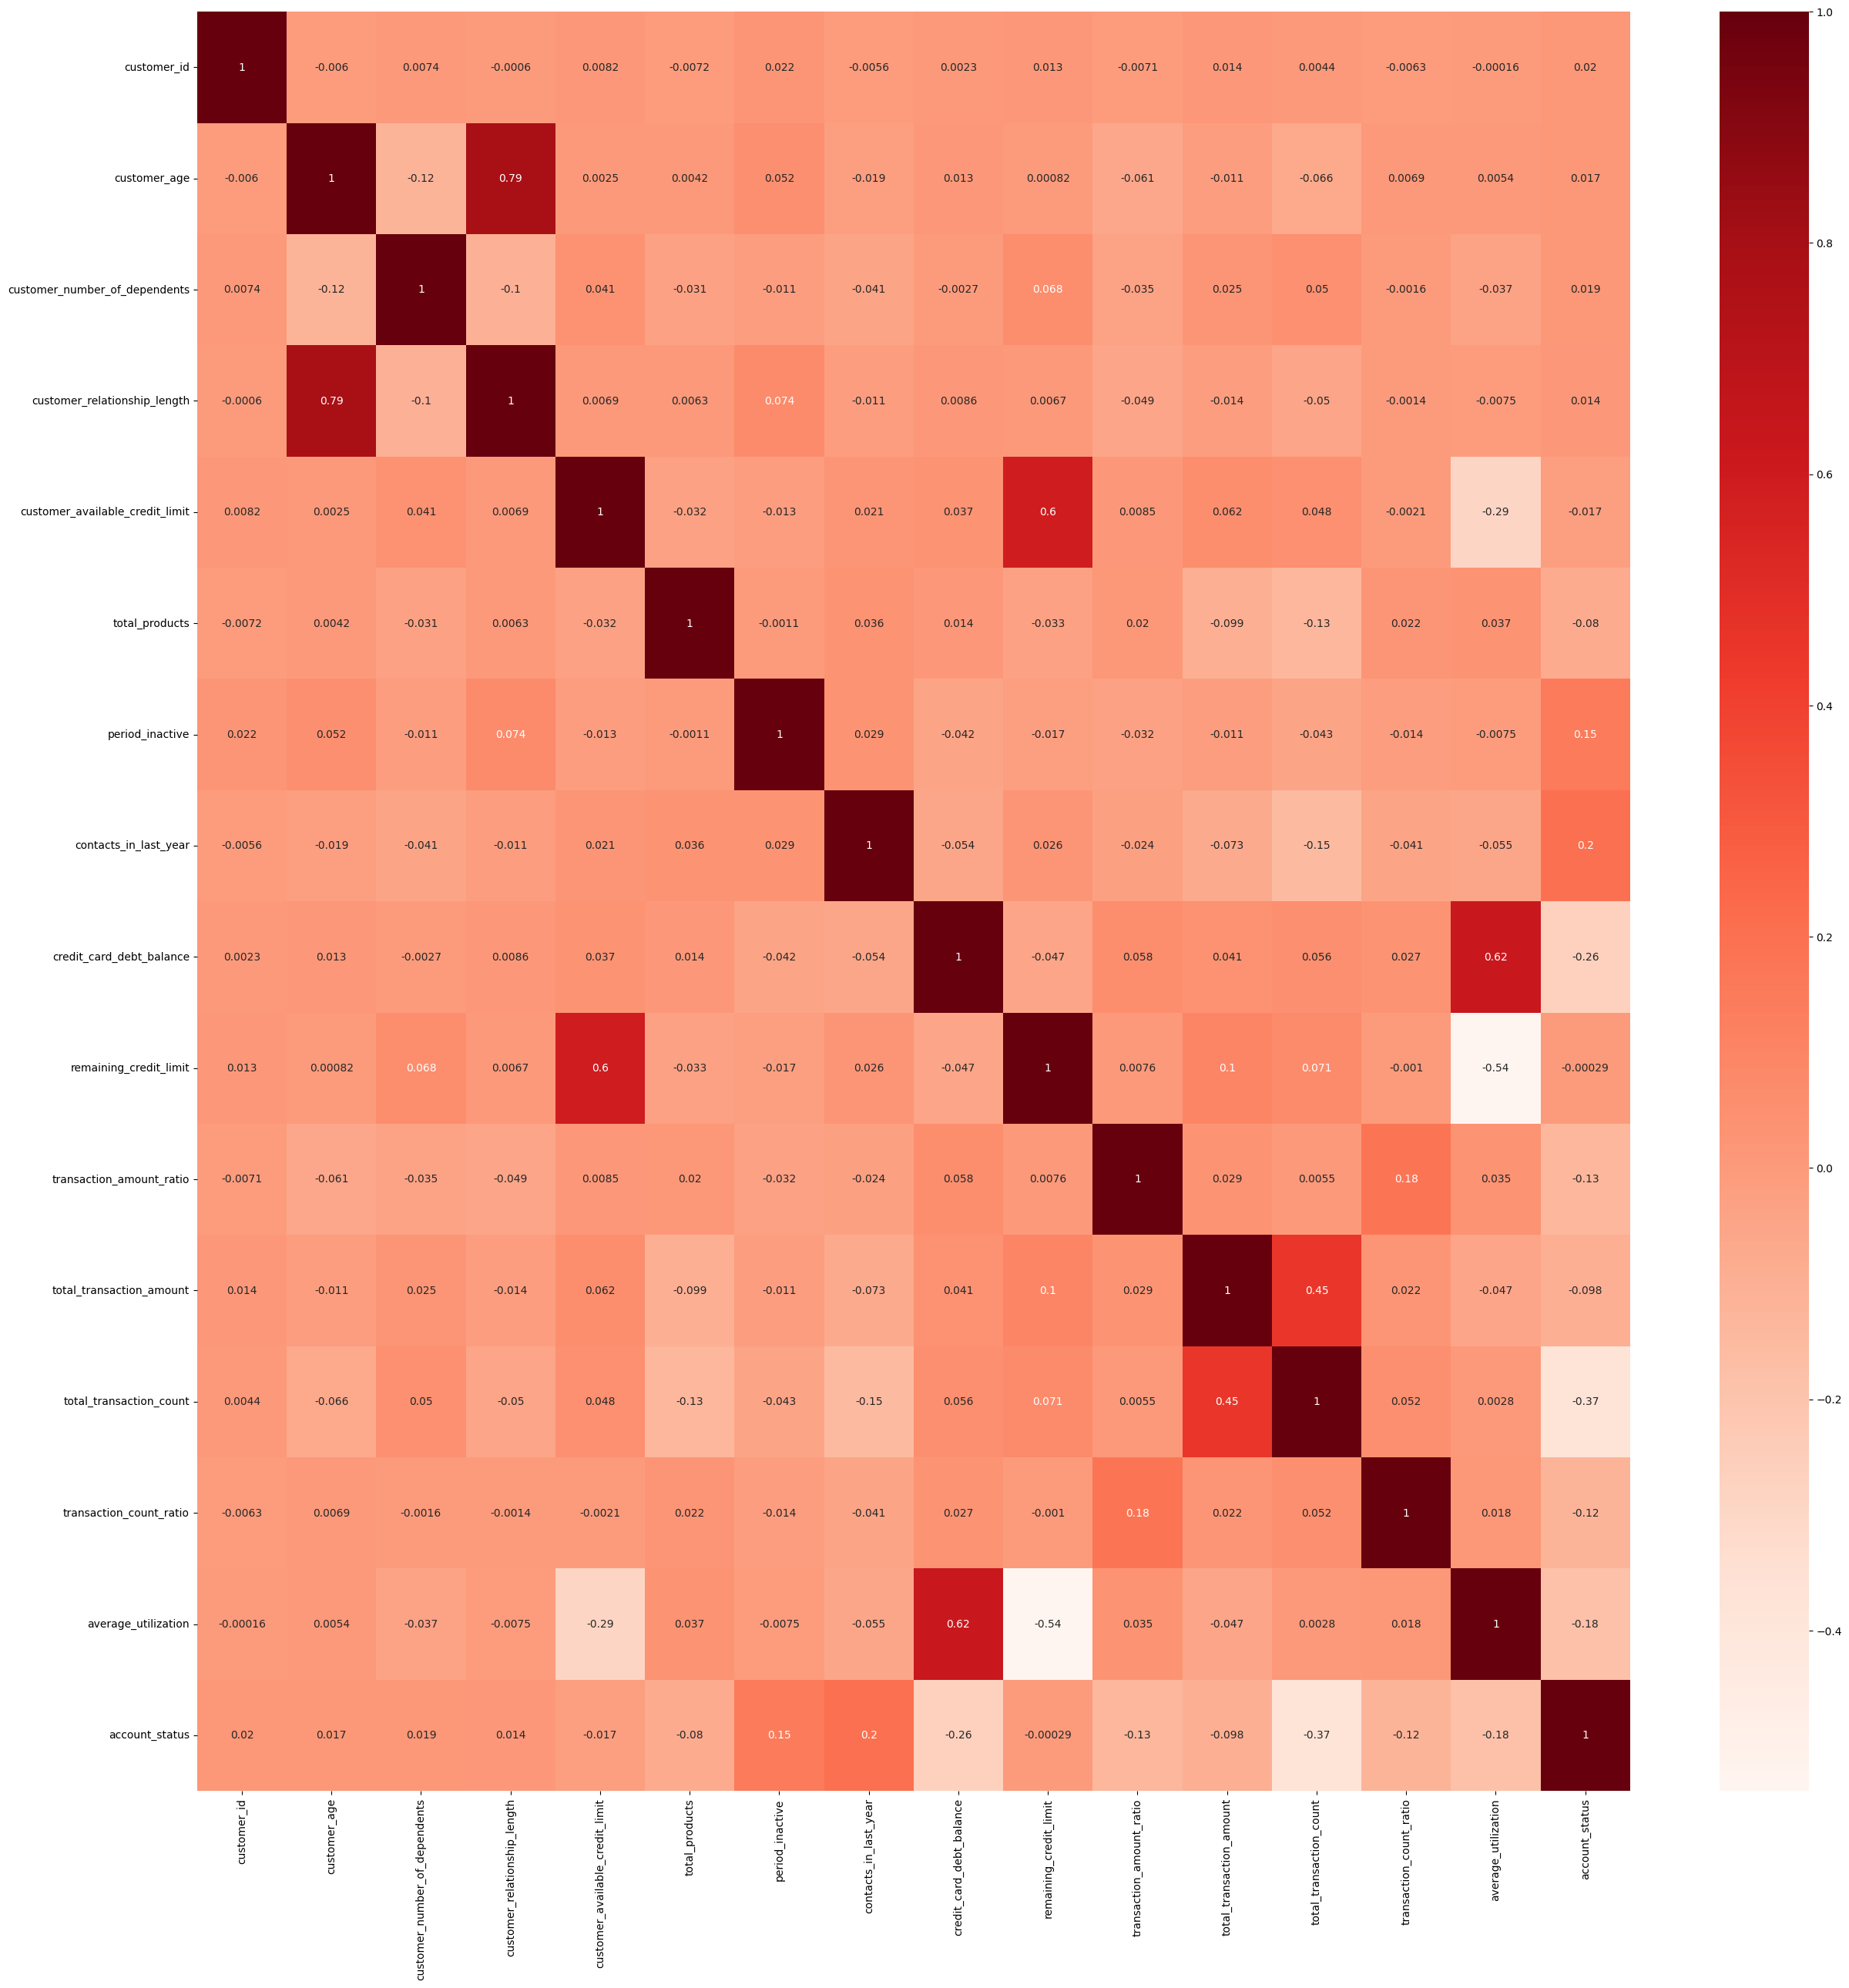

In [34]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = client_attrition_not_processed.select_dtypes(exclude= ['object']).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [35]:
print(abs(cor["account_status"])[abs(cor["account_status"])>0.5])

account_status    1.0
Name: account_status, dtype: float64
